# Quiz 2: Introducción a la Ciencia de Datos práctica

&emsp; **Asignatura:** Big Data. <br>
&emsp; **Profesor:** Juan Martín Londoño Zuluaga. <br>
&emsp; **Período:** 2023-II.

&emsp; **Estdiante:** <indique su nombre aquí>

Usted es contratada/o como analista para una gran empresa de la India/Bahrat: FULL Trabajo. El CEO le recibe personalmente y le agradece su tiempo. El CEO quiere conocer profundamente cómo se comporta su capital humano, por lo cual le entrega una base de datos de las personas de su empresa que se encuentra en el siguiente [enlace](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/data).

Tras unos cuantos tés, le extiende sus preocupaciones:

# 1. Importe de los datos

Importe los datos del archivo `spotify-2023.csv`:

In [1]:
import pandas as pd

labour = pd.read_csv('datain/Employee.csv')
labour.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [2]:
labour.shape

(4653, 9)

# 2. Calidad de la base de datos

## 2.1. Valores perdidos

Encuentre el número y porcentaje respecto al total de los valores perdidos que tiene la base de datos:
* ¿Qué nivel de pérdida de datos se tiene?
* ¿Es significativa la pérdida de datos?
* Si sí, ¿qué estrategia propone para afrontarlo?

In [3]:
# Numero de missings
labour.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [4]:
# Numero de missings
labour.isnull().sum()/labour.shape[0]

Education                    0.0
JoiningYear                  0.0
City                         0.0
PaymentTier                  0.0
Age                          0.0
Gender                       0.0
EverBenched                  0.0
ExperienceInCurrentDomain    0.0
LeaveOrNot                   0.0
dtype: float64

## 2.2. Valores únicos

Encuentre el número de valores únicos por columna:

In [5]:
labour.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [6]:
labour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
for col in labour.columns:
    print("Columna: " + col + "\n")
    print(labour[col].unique())
    print("\n")

Columna: Education

['Bachelors' 'Masters' 'PHD']


Columna: JoiningYear

[2017 2013 2014 2016 2015 2012 2018]


Columna: City

['Bangalore' 'Pune' 'New Delhi']


Columna: PaymentTier

[3 1 2]


Columna: Age

[34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]


Columna: Gender

['Male' 'Female']


Columna: EverBenched

['No' 'Yes']


Columna: ExperienceInCurrentDomain

[0 3 2 5 1 4 7 6]


Columna: LeaveOrNot

[0 1]




# 3. Análisis descriptivo

El CEO de la empresa le hace las siguientes preguntas:

* ¿Existe un rango etario de personas que predomina en la empresa?
* ¿La empresa tiene un sesgo de género? Considere un análisis sobre el número de personas contratadas y el rango de pago.
* ¿El año de vinculación varía según la ciudad de la que es originario?


# 4. Análisis prescriptivo

El CEO le interesa saber dos cosas puntuales:

* En primer lugar, al CEO le interesa mantener a su capital humano y evitar la circulación de trabajadores, ya que, si un trabajador renuncia, debe contratar uno nuevo cuya curva de aprendizaje puede demorarse para mantener el potencial de trabajo. En ese sentido, le pide que haga un análisis sobre cuáles son los factores determinantes para que la gente se vaya de la empresa.
* Sin querer, la persona encargada de los datos no especificó qué significa cada nivel de pago (`PaymentTier`). Le pide que le ayude a saber cuáles son los niveles operativos, cuáles los niveles administrativos y cuáles los niveles directivos de pagos. Quiere que le explique su análisis.

In [32]:
labour.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [ ]:
table = (
    labour
    .assign(contador = 1)
    .groupby(['PaymentTier', 'ExperienceInCurrentDomain'])
    .count()
    .reset_index()
    [['PaymentTier', 'ExperienceInCurrentDomain', 'contador']]
)

In [38]:
table = (
    labour
    .assign(contador = 1)
    .groupby(['PaymentTier', 'ExperienceInCurrentDomain'])
    .count()
    .reset_index()
    [['PaymentTier', 'ExperienceInCurrentDomain', 'contador']]
)

table.sort_values('contador', ascending=False)

,PaymentTier,ExperienceInCurrentDomain,contador
18,3,2,784
20,3,4,704
21,3,5,700
19,3,3,595
17,3,1,432
16,3,0,264
10,2,2,252
12,2,4,184
13,2,5,174
11,2,3,150


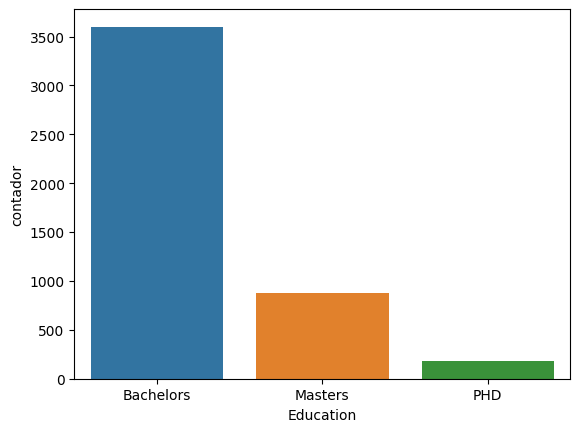

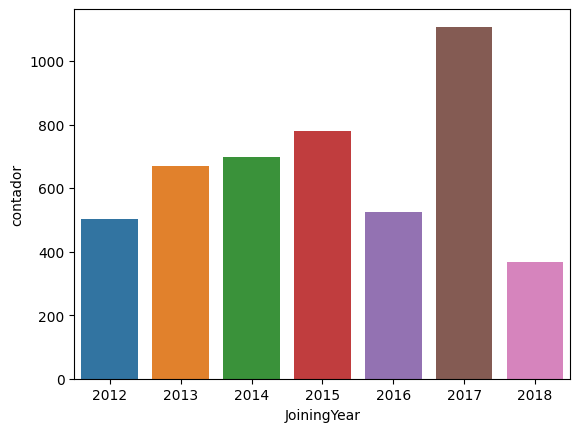

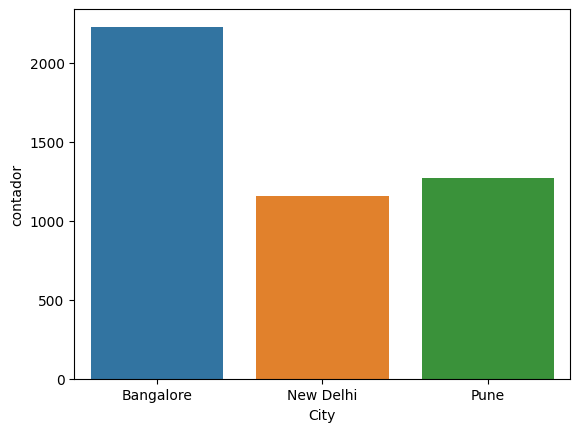

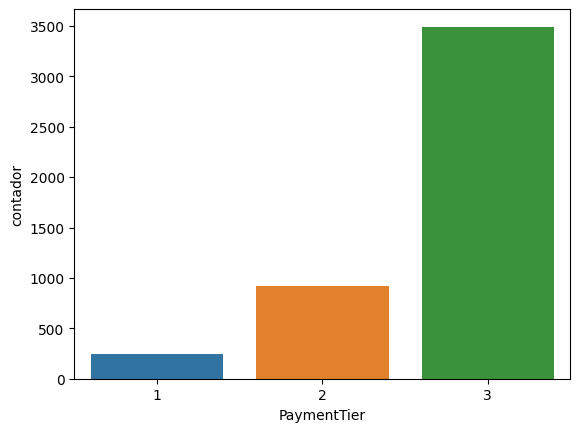

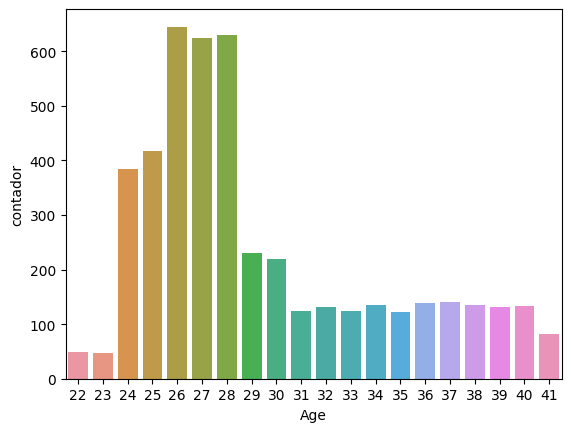

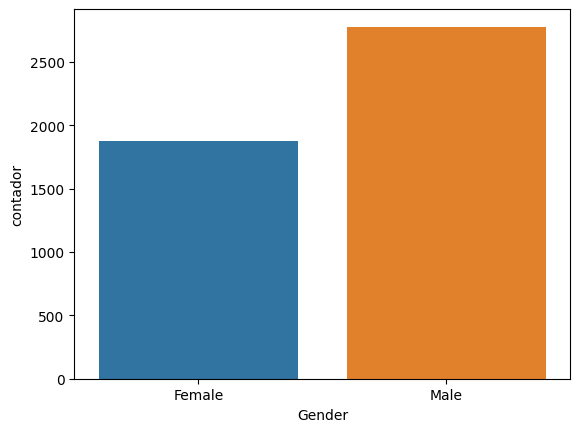

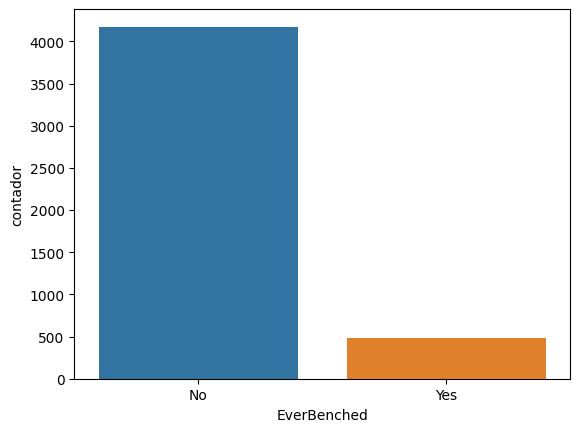

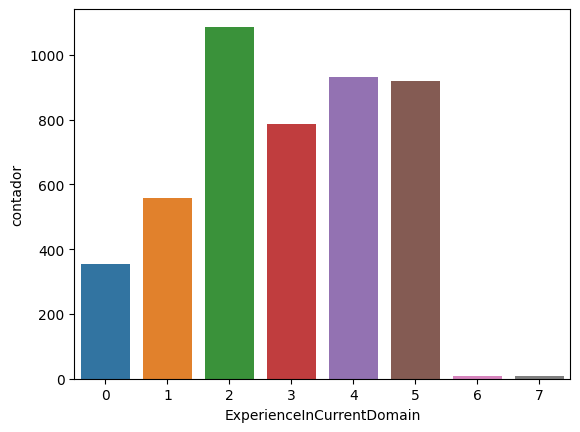

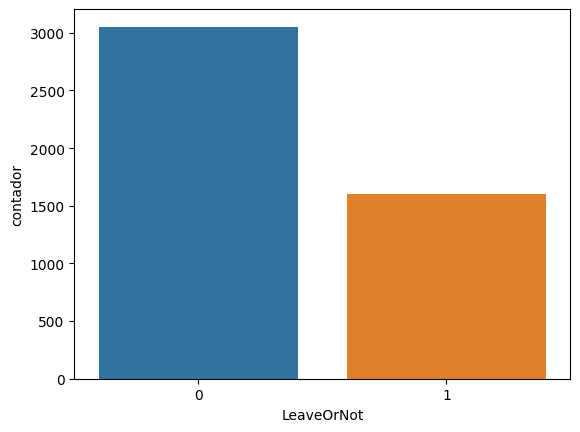

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in labour.columns:
    table = (
        labour
        .assign(contador = 1)
        .groupby(var)
        .count()
        .reset_index()
        [[var, 'contador']]
    )

    sns.barplot(x = var, y = 'contador', data = table)

    plt.show()

In [9]:
labour.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

<Axes: xlabel='PaymentTier', ylabel='ExperienceInCurrentDomain'>

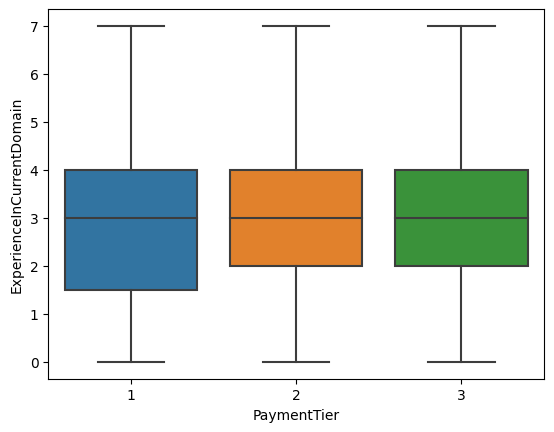

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

table = (
    labour
    .assign(contador = 1)
    .groupby(['PaymentTier', 'ExperienceInCurrentDomain'])
    .count()
    .reset_index()
    [['PaymentTier', 'ExperienceInCurrentDomain', 'contador']]
)

sns.boxplot(x = 'PaymentTier', y = 'ExperienceInCurrentDomain', data = labour)

In [44]:
labour.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [61]:
table1 = (
    labour
    .assign(contador = 1)
    .groupby(['Education', 'PaymentTier'])
    .count()
    .reset_index()
    [['PaymentTier', 'Education', 'contador']]
)

table2 = (
    labour
    .assign(contador = 1)
    .groupby(['PaymentTier'])
    .count()
    .reset_index()
    [['PaymentTier', 'contador']]
)

table = table1.merge(table2, on = 'PaymentTier')
table['perc'] = table['contador_x']/table['contador_y']
table.sort_values('perc', ascending=False)

,PaymentTier,Education,contador_x,contador_y,perc
6,3,Bachelors,2885,3492,0.826174
0,1,Bachelors,173,243,0.711934
3,2,Bachelors,543,918,0.591503
4,2,Masters,355,918,0.386710
1,1,Masters,56,243,0.230453
7,3,Masters,462,3492,0.132302
2,1,PHD,14,243,0.057613
8,3,PHD,145,3492,0.041523
5,2,PHD,20,918,0.021786


In [ ]:
(
    labour
    .groupby('Education')
    .count()
    .reset_index()
    [['Education', 'PaymentTier']]
)

In [26]:
labour.select_dtypes(include=numerics).corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


In [23]:
labour.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

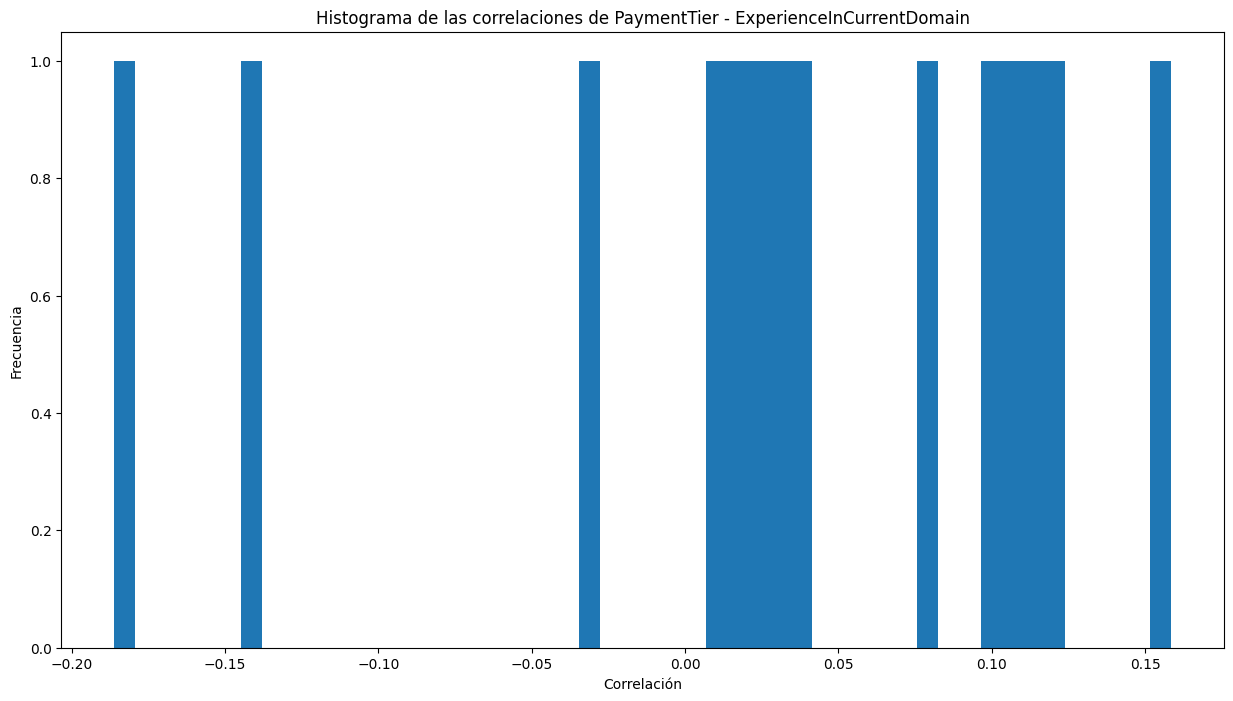

Average correlation: 0.030943240674180948


In [42]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

var = 'Age'
var_comp1 = 'PaymentTier'
var_comp2 = 'ExperienceInCurrentDomain'

# Se obtienen los barrios
var_level = labour[var].unique()

# Se crea un diccionario para tener las correlaciones por barrios
cvec = list()
cvec = dict()

# Se agrupa por barrios y se calcula la correlación
for i in var_level:
    temp = labour[labour[var] == i]
    cvec[i] = temp.select_dtypes(include=numerics).corr()[var_comp1][var_comp2]
    
# Se guardan los resultados
res = list(cvec.values())

# Se borran aquellos que tienen missings
res = [x for x in res if str(x) != 'nan']

# Se organizan los datos
res.sort()

# Se hace un histograma
plt.figure(figsize = (15,8)) 
plt.hist(res, bins=50)
plt.title('Histograma de las correlaciones de ' + var_comp1 + " - " + var_comp2)
plt.ylabel('Frecuencia'); plt.xlabel('Correlación')
plt.show()

# Se obtiene la correlación promedio entre barrios
print('='*100 + '\n' + 'Average correlation: ' + str(sum(res)/len(res)) + '\n' + '='*100)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

table = (
    labour
    .assign(contador = 1)
    .groupby('Age')
    .count()
    .reset_index()
    [['Age', 'contador']]
)

sns.barplot(x = 'Age', y = 'contador', data = table)